Lets start with importing the new `Class`/`function`:

In [42]:
from pliers.extractors import MFCCEnergyExtractor

In [43]:
from pliers.stimuli import AudioStim

In [44]:
punk = 'Punk1.wav'

In [45]:
stim = AudioStim(punk)

In [46]:
stim.get_sampling_rate(punk)

44100

We set up two extractors, one for `timbre` and one for `pitch`:

In [47]:
timbre_extractor = MFCCEnergyExtractor(direction='low', n_mels=48, hop_length=512)
pitch_extractor = MFCCEnergyExtractor(direction='high', n_mels=48, hop_length=512)

We'll have a look at the respective outputs:

In [22]:
timbre_punk = timbre_extractor.transform(punk)
pitch_punk = pitch_extractor.transform(punk)

In [23]:
timbre_punk.data.shape

(517, 52)

In [24]:
pitch_punk.data

,order,duration,onset,object_id,mfcc_energy_0,mfcc_energy_1,mfcc_energy_2,mfcc_energy_3,mfcc_energy_4,mfcc_energy_5,...,mfcc_energy_38,mfcc_energy_39,mfcc_energy_40,mfcc_energy_41,mfcc_energy_42,mfcc_energy_43,mfcc_energy_44,mfcc_energy_45,mfcc_energy_46,mfcc_energy_47
0,0,0.01161,0.000000,0,0.163191,4.706546,4.885123,0.078077,2.218527,8.847148,...,1.704963,1.059944,0.389165,0.628212,1.581885,7.872818,0.329114,0.201459,1.293900,2.259982
1,1,0.01161,0.011610,0,0.085162,9.071447,2.750197,0.352333,0.896688,11.922823,...,0.865045,1.371411,0.468070,0.859659,1.220615,14.569367,0.217405,0.075570,1.512161,4.207537
2,2,0.01161,0.023220,0,0.066692,11.702603,3.918437,0.271510,0.702952,12.616919,...,0.828747,0.715041,0.510587,1.201724,1.305635,25.302497,0.173143,0.025609,1.685968,7.586632
3,3,0.01161,0.034830,0,0.782208,2.068622,0.367984,0.721129,1.434413,28.719363,...,0.729763,0.481138,0.454243,1.750932,1.758008,21.410501,0.169048,0.016732,1.783966,9.729688
4,4,0.01161,0.046440,0,1.598696,3.184220,0.062560,1.480056,1.086849,12.450639,...,0.707902,0.714744,0.280231,1.396814,2.091190,26.004107,0.182151,0.017410,1.688678,8.782575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,0.01161,5.944308,0,0.132949,4.939989,1.624981,0.991247,1.528192,2.592879,...,0.673813,1.053383,0.541107,1.160608,2.443385,12.452387,0.063495,0.118522,1.650468,4.873781
513,513,0.01161,5.955918,0,0.073934,8.014049,1.227328,2.405796,1.067334,2.872197,...,0.880103,1.209516,0.587042,1.261505,1.866333,18.948470,0.054359,0.060346,1.803385,7.390749
514,514,0.01161,5.967528,0,0.269500,3.823129,0.382157,2.317919,3.082434,2.986903,...,0.606968,1.277810,0.509298,1.253728,3.083969,23.794717,0.034072,0.036995,2.057328,10.187896
515,515,0.01161,5.979138,0,1.863893,1.721941,0.109027,1.579559,1.699107,3.956083,...,0.514963,1.275834,0.353609,1.646907,4.182381,19.551351,0.030481,0.040779,2.174096,9.421137


KK, visualizing things might also be helpful.

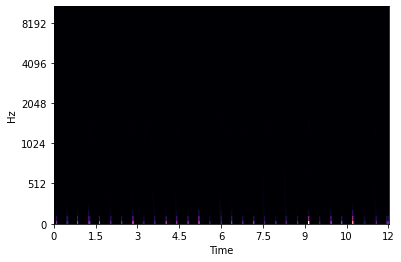

In [25]:
from librosa import display
display.specshow(timbre_punk.data.iloc[:, 4:].T.to_numpy(), y_axis='mel', x_axis='time')

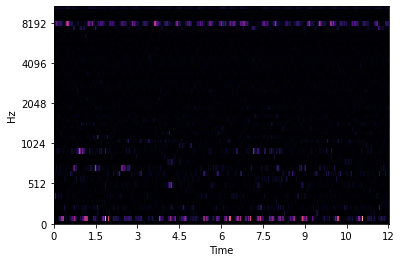

In [26]:
display.specshow(pitch_punk.data.iloc[:, 4:].T.to_numpy(), y_axis='mel', x_axis='time')

Now we'll compare that to the output of the function Peer used so far:

In [27]:
# define dct-function like Hanke et al. for timbre, pitch and spectrum
def dct_II(N):
    # Create N x N matrix of discrete cosine transform coefficients
    # Uses DCT-II formula:https://en.wikipedia.org/wiki/Discrete_cosine_transform#DCT-II
    d = np.array([np.cos(np.pi / N * (np.arange(N) + 0.5) * k)
                  for k in np.arange(N)],
                 dtype='f4')
    d[0] *= 1 / np.sqrt(2)
    d *= np.sqrt(2.0 / N)
    return d

In [28]:
from librosa import load, feature
import numpy as np
y, sr = load(punk, sr=None)
nBands = 48
nCoefs = 13
DCT = dct_II(nBands)

mfs = feature.melspectrogram(y=y, sr=sr, n_mels=48)
mfcc = np.dot(DCT, 20 * np.log10(mfs + np.finfo(float).eps))

In [29]:
# timbre 
lq_mfs = np.dot(DCT[:nCoefs].T, mfcc[:nCoefs])
lq_mfs_norm = 10 ** (lq_mfs / 20.)

In [30]:
lq_mfs

array([[  23.418068,   25.954815,   26.186455, ...,   36.878727,
          41.06066 ,   37.33686 ],
       [  19.483458,   25.173761,   25.810421, ...,   33.31904 ,
          35.475357,   31.180565],
       [  13.142012,   23.44126 ,   24.72218 , ...,   26.854645,
          25.934   ,   20.878624],
       ...,
       [ -77.28765 ,  -83.56362 , -101.66936 , ..., -102.91837 ,
        -101.57619 ,  -77.55679 ],
       [ -88.0054  ,  -99.30786 , -127.95965 , ..., -130.42311 ,
        -128.34267 ,  -92.47256 ],
       [ -94.19185 , -108.59271 , -143.53215 , ..., -146.76175 ,
        -144.18904 , -101.20898 ]], dtype=float32)

In [31]:
lq_mfs.shape

(48, 517)

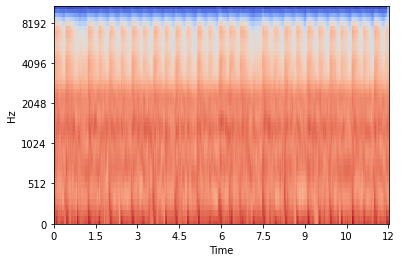

In [32]:
# visualize timbre
display.specshow(lq_mfs, y_axis='mel', x_axis='time')

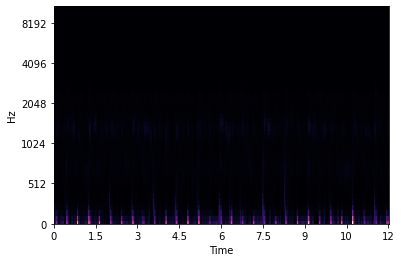

In [33]:
# Normalized LQ MFS using Hanke implementation

display.specshow(lq_mfs_norm, y_axis='mel', x_axis='time')

In [34]:
lq_mfs_norm_pliers = timbre_punk.data.iloc[:, 4:].T.to_numpy()

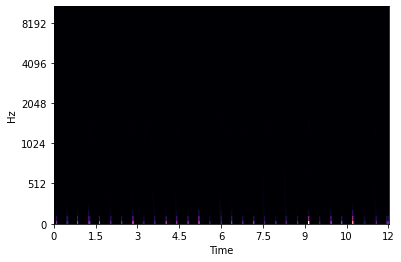

In [35]:
# Normalized LQ MFS using pliers / librosa implementation

display.specshow(lq_mfs_norm_pliers, y_axis='mel', x_axis='time')

In [36]:
# pitch
mfs = feature.melspectrogram(y=y, sr=sr, n_mels=48)
DCT = dct_II(nBands)
mfcc = np.dot(DCT, 20 * np.log10(mfs + np.finfo(float).eps))
hq_mfs = np.dot(DCT[nCoefs:].T, mfcc[nCoefs:])
hq_mfs_norm = 10 ** (hq_mfs / 20.)

In [37]:
hq_mfs.shape

(48, 517)

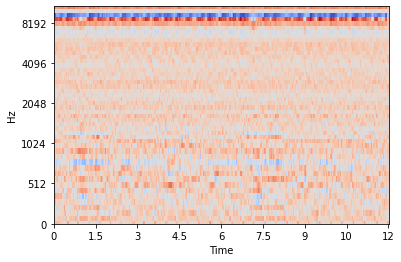

In [38]:
# visualize pitch
display.specshow(hq_mfs, y_axis='mel', x_axis='time')

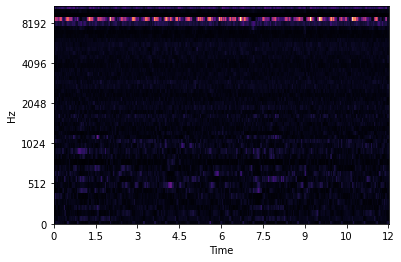

In [39]:
# Normalized HQ MFS using Hanke's code
display.specshow(hq_mfs_norm, y_axis='mel', x_axis='time')

In [40]:
hq_mfs_norm_pliers = pitch_punk.data.iloc[:, 4:].T.to_numpy()

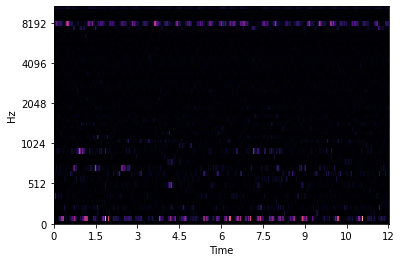

In [41]:
# Normalized HQ MFS using pliers / librosa implementation
display.specshow(hq_mfs_norm_pliers, y_axis='mel', x_axis='time')